In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape


(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

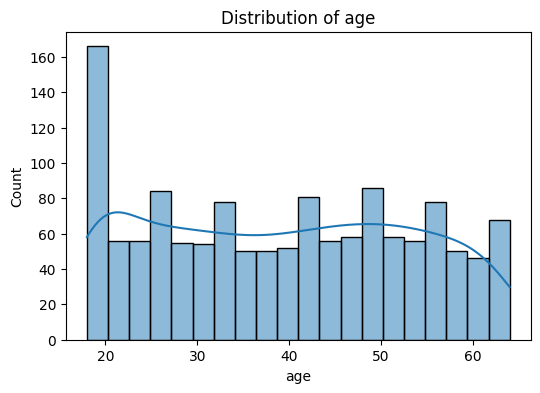

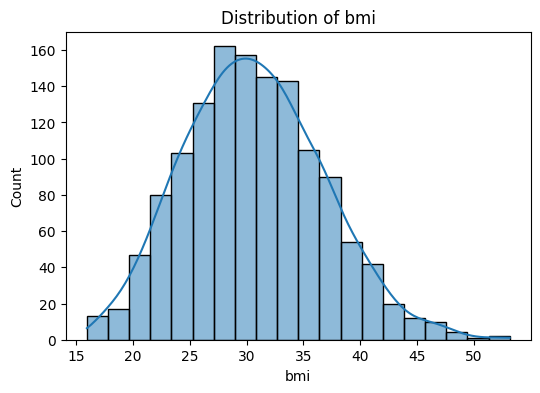

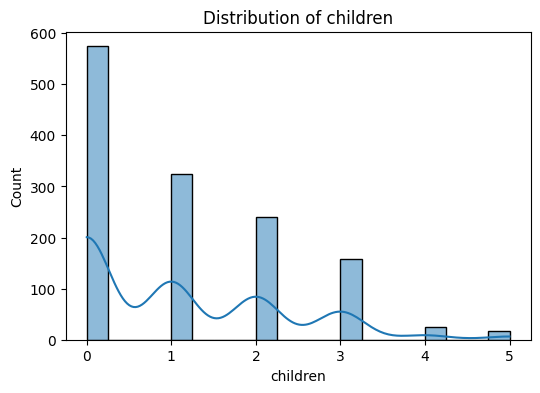

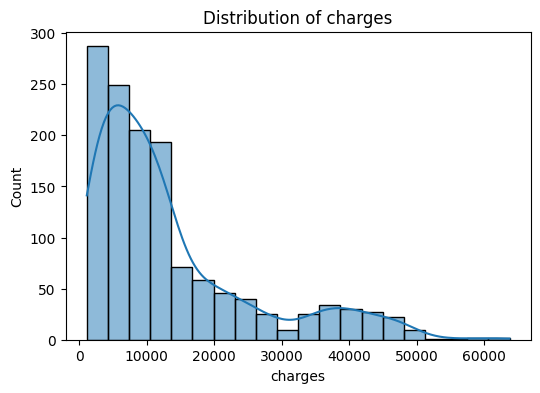

In [11]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
# For checking the distribution of numerical columns

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='children', ylabel='count'>

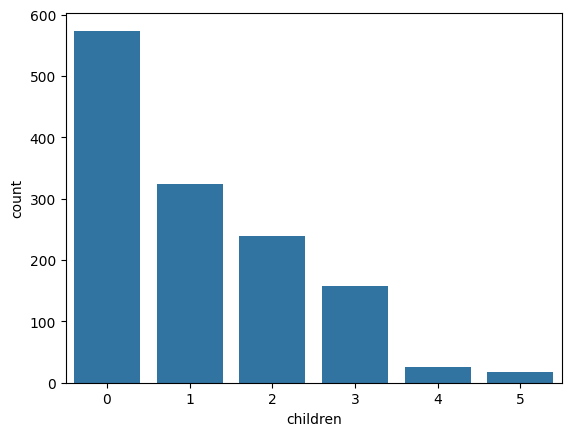

In [12]:
sns.countplot(x='children', data=df)

<Axes: xlabel='sex', ylabel='count'>

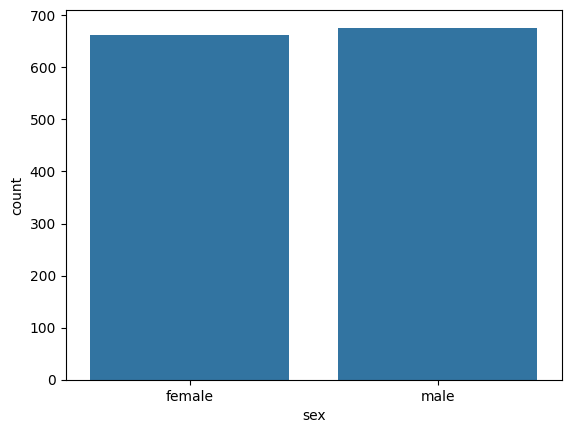

In [13]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='smoker', ylabel='count'>

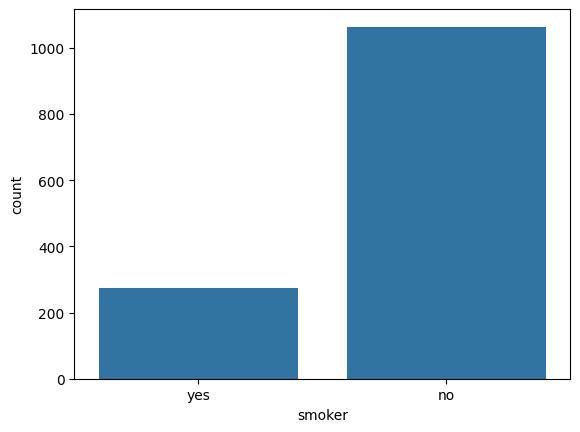

In [14]:
sns.countplot(x= 'smoker', data=df)


Above we were just Analyzing the data and columns individually. Now we will Analyze the data by combining the input with the output variables and analyze their relationship.

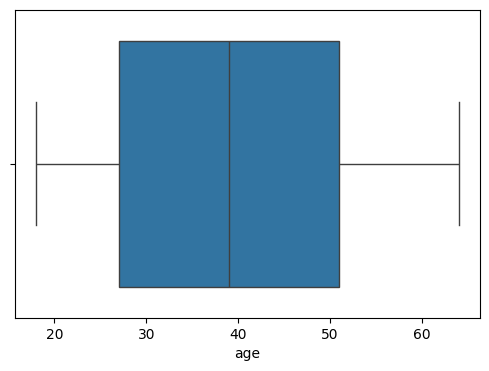

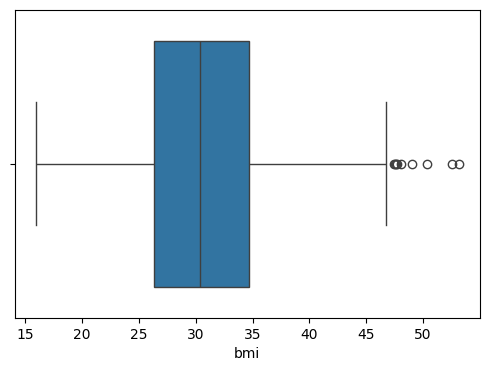

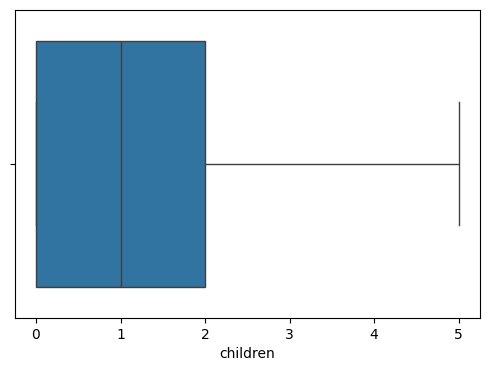

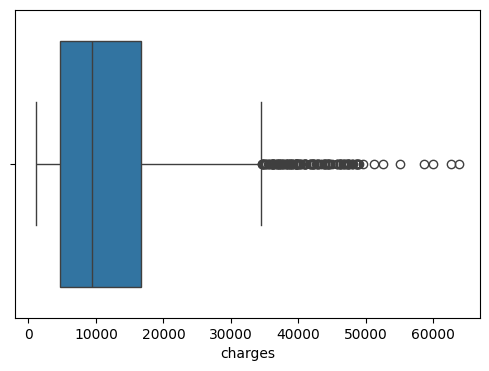

In [15]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

### 🔍 Correlation
**Definition:**  
Correlation measures the **strength** and **direction** of a linear relationship between two numerical variables.  
- Ranges from **-1 to +1**:
  - `+1`: Perfect positive relationship (both increase together)
  - `0`: No linear relationship
  - `-1`: Perfect negative relationship (one increases, the other decreases)

**Intuition (How to Calculate):**  
1. Take two variables (X and Y).  
2. Find their means (average values).  
3. For each data point, calculate how far X and Y are from their means.  
4. Multiply these differences for each pair, then average them → this gives covariance.  
5. Divide by the product of their standard deviations to normalize the value between -1 and 1.  
6. The closer the number is to ±1, the stronger the linear relationship.

---

### 🔥 Heatmap
**Definition:**  
A heatmap is a **color-coded visualization** of data in a matrix format.  
When used for correlations, it visually shows **which variables are strongly or weakly related**.

**Intuition (How to Create):**  
1. Select all numeric columns of your dataset.  
2. Compute the correlation values for every pair of variables.  
3. Arrange these values in a matrix form (rows and columns are variables).  
4. Map the numbers to colors (e.g., red for high, blue for low).  
5. Plot the color grid to easily see strong and weak relationships.


<Axes: >

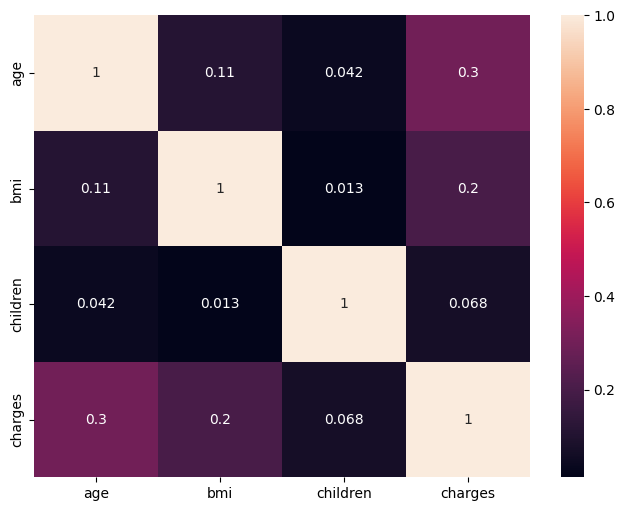

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [50]:
df_cleaned = df.copy()

In [51]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df_cleaned.shape

(1338, 7)

In [53]:
df_cleaned.drop_duplicates(inplace = True)

In [54]:
df_cleaned.shape

(1337, 7)

In [55]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [57]:

df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [58]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no" : 0,"yes" : 1})

In [59]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [60]:
df_cleaned.rename(columns={
    'sex' :'is_female',
    'smoker': 'is_smoker'
                          },inplace = True)

In [61]:

df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [62]:
df_cleaned['is_female'] = df_cleaned['is_female'].map({"male" : 0,"female" : 1})

In [63]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [64]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [65]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['region'],drop_first=True)

In [66]:

df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [67]:
df_cleaned = df_cleaned.astype(int)

df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


## Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

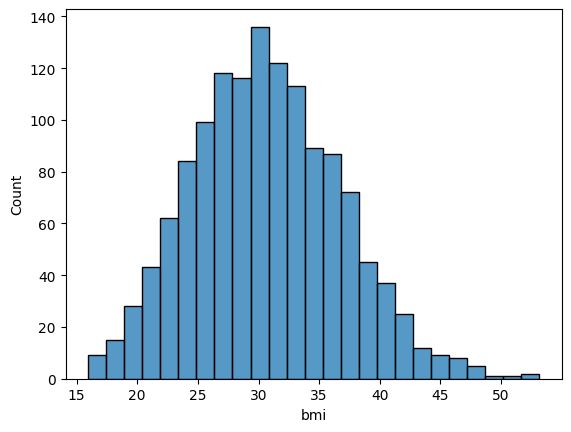

In [68]:
sns.histplot(df['bmi'])

In [69]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, np.inf],
    labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity']
)

In [70]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity
2,28,0,33,3,0,4449,0,1,0,Obesity
3,33,0,22,0,0,21984,1,0,0,Normal weight
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obesity
1334,18,1,31,0,0,2205,0,0,0,Obesity
1335,18,1,36,0,0,1629,0,1,0,Obesity
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [71]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [72]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal weight', 'bmi_category_Overweight',
       'bmi_category_Obesity'],
      dtype='object')

In [73]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scalar = StandardScaler()

df_cleaned[cols] = scalar.fit_transform(df_cleaned[cols])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal weight,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [74]:
from scipy.stats import pearsonr

# Check actual column names first
print("Available columns:", df_cleaned.columns.tolist())

# Updated feature list with correct column names
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal weight',  # Note the space
    'bmi_category_Overweight', 
    'bmi_category_Obesity'  # Note: "Obesity" not "Obese"
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation with Charges'])

correlation_df.sort_values(by='Pearson Correlation with Charges', ascending=False)

Available columns: ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi_category_Normal weight', 'bmi_category_Overweight', 'bmi_category_Obesity']


,Feature,Pearson Correlation with Charges
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal weight,-0.104042


## Chi square test

In [75]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal weight', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

In [76]:
from scipy.stats import chi2_contingency

alpha = 0.05

df_cleaned['charges_bins'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_results = {}

for col in cat_features:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['charges_bins'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    decision = 'Reject H0 (Keep Feature)' if p < alpha else 'Fail to Reject H0 (Drop Feature)'

    chi2_results[col] = {
        'chi2_statistic': chi2,
        'p_value': p,
        'Decision': decision
    }

    chi2_df = pd.DataFrame(chi2_results).T
    chi2_df = chi2_df.sort_values(by='p_value')
    chi2_df

In [44]:
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject H0 (Keep Feature)
region_southeast,15.998167,0.001135,Reject H0 (Keep Feature)
is_female,10.258784,0.01649,Reject H0 (Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject H0 (Keep Feature)
region_southwest,5.091893,0.165191,Fail to Reject H0 (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Fail to Reject H0 (Drop Feature)
bmi_category_Normal weight,3.708088,0.29476,Fail to Reject H0 (Drop Feature)
region_northwest,1.13424,0.768815,Fail to Reject H0 (Drop Feature)


In [77]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obesity']]

In [78]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


## Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = final_df.drop('charges', axis=1)
Y = final_df['charges']

In [81]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=42)

## Create the model

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Model Performance Evaluation

In [84]:
Y_pred = model.predict(X_test)
Y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [87]:
from sklearn.metrics import r2_score

# Model Performance Evaluation
r2 = r2_score(Y_test, Y_pred)

# Adjusted R-squared calculation

n = X_test.shape[0]  # number of observations in test set
p = X_test.shape[1] # number of predictors in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.8040712413347118
Adjusted R-squared: 0.7987962362937232
